# Single Layer Neural Network

Load the Fashion MNIST dataset in Jupyter into fashion/data folder and start running the below cells (i.e Create the fashion 
folder and create data folder within it and copy all the Fashion MNIST zip files)
Note: Please unzip the datasets in data folder and delete the zip files
No external python file is needed to run the below code
Single Layer, Multi Layer and CNN are all included in this single ipynb file

In [465]:
# This cell just reads the filenames from the folder path given
import os 
import gzip 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from subprocess import check_output
print("Here are the input datasets: ")
print(check_output(["ls", "fashion/data"]).decode("utf8"))

Here are the input datasets: 
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [466]:
# Code from util_mnist_reader from UBLearns
from itertools import chain
def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte'% kind)
    
    with open(labels_path,'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
#     print(labels)

    with open(images_path,'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels),28,28)
#     print(images.shape)     

    return images, labels

In [467]:
# Data Load
train_X, train_Y = load_mnist('fashion/data', kind='train')
test_X, test_Y = load_mnist('fashion/data', kind='t10k')
print(train_X.shape)

#Normalize the data
train_X= (train_X / 255) - 0.5
test_X = (test_X / 255) - 0.5
# print(X_train)

# Flatten the images.
train_X = train_X.reshape((-1, 784))
test_X = test_X.reshape((-1, 784))

print(train_X.shape) # (60000, 784)
print(test_X.shape)  # (10000, 784)
m_train = train_X.shape[0]
m_test = test_X.shape[0]

(60000, 28, 28)
(60000, 784)
(10000, 784)


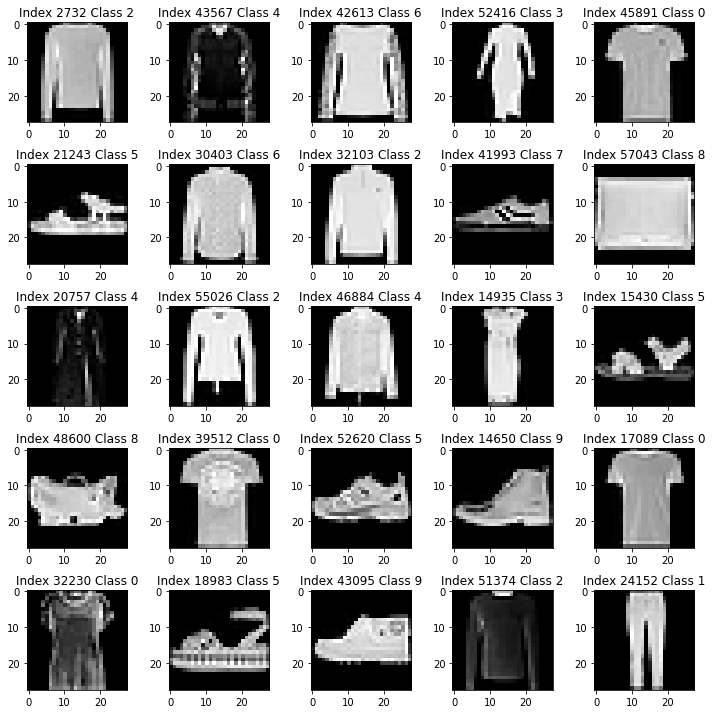

In [468]:
# random check with fifteen training examples
np.random.seed(0);
img = list(np.random.randint(m_train,size=25))
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_X[img[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(img[i], train_Y[img[i]]))
    plt.tight_layout()

In [469]:
# Subsampling the data
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = train_X[mask]
y_val = train_Y[mask]

mask = list(range(m_train))
train_X = train_X[mask]
train_Y = train_Y[mask]

mask = list(range(m_test))
test_X = test_X[mask]
test_Y = test_Y[mask]

In [470]:
print("train_images:", train_X.shape)
print("test_images:", test_X.shape)
# train_images: (60000, 28, 28)
# test_images: (10000, 28, 28)
m_train = train_X.shape[0]
m_test = test_X.shape[0]

train_images: (59000, 784)
test_images: (10000, 784)


In [471]:
print("X_train shape: " + str(train_X.shape))
print("y_train shape: " + str(train_Y.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(test_X.shape))
print("y_test shape: " + str(test_Y.shape))
print ("Number of training samples: m_train = " + str(m_train))
print ("Number of validation samples: m_validation = " + str(m_validation))
print ("Number of testing samples: m_test = " + str(m_test))

X_train shape: (59000, 784)
y_train shape: (59000,)
X_val shape: (1000, 784)
y_val shape: (1000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training samples: m_train = 59000
Number of validation samples: m_validation = 1000
Number of testing samples: m_test = 10000


In [472]:
print("Feature Values: \nFrom " + str(np.min(train_X)) + " to " + str(np.max(train_X)))
print("Data type: " + str(train_X.dtype))
print("\nLabel Values: ")
print(set(list(train_Y)))
print("Data type: " + str(train_Y.dtype))

Feature Values: 
From -0.5 to 0.5
Data type: float64

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data type: uint8


In [473]:
class TwoLayerNet(object):    


    def __init__(self, input_size, hidden_size, output_size, std=1e-4): 

        self.params = {}    
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)   
        self.params['b1'] = np.zeros((1, hidden_size))    
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)   
        self.params['b2'] = np.zeros((1, output_size))

    def loss(self, X, y=None, reg=2.0):

        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        
        # Compute the forward pass
        scores = None
        h1 = ReLU(np.dot(X, W1) + b1)      
        out = np.dot(h1, W2) + b2          
        scores = out
        
        # If the targets are not given then jump out, we're done
        if y is None:   
            return scores
        
        # Compute the loss
        scores_max = np.max(scores, axis=1, keepdims=True)    # (N,1)
        exp_scores = np.exp(scores - scores_max)              # (N,C)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    # (N,C)
        correct_logprobs = -np.log(probs[range(N), y])        # (N,1)
        data_loss = np.sum(correct_logprobs) / N
        reg_loss = 0.5 * reg * np.sum(W1*W1) + 0.5 * reg * np.sum(W2*W2)
        loss = data_loss + reg_loss
        
        # Backward pass: compute gradients
        grads = {}
        dscores = probs                                 # (N,C)
        dscores[range(N), y] -= 1
        dscores /= N
        dW2 = np.dot(h1.T, dscores)                     # (H,C)
        db2 = np.sum(dscores, axis=0, keepdims=True)    # (1,C)
        dh1 = np.dot(dscores, W2.T)                     # (N,H)
        dh1[h1 <= 0] = 0
        dW1 = np.dot(X.T, dh1)                          # (D,H)
        db1 = np.sum(dh1, axis=0, keepdims=True)        # (1,H)
        dW2 += reg * W2
        dW1 += reg * W1
        
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2

        return loss, grads

    def train(self, X, y, X_val, y_val, learning_rate=250e-4, 
               learning_rate_decay=0.95, reg=0.07, mu=0.9, num_epochs=10, 
               mu_increase=1.0, batch_size=200, verbose=False):    

        num_train = X.shape[0]
        iterations_per_epoch = max(int(num_train / batch_size), 1)
        
        # Use SGD to optimize the parameters in self.model
        v_W2, v_b2 = np.random.rand(2)
        v_W1, v_b1 = np.random.rand(2)
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in range(1, num_epochs * iterations_per_epoch + 1):   
            X_batch = None   
            y_batch = None 
            
            # Create a random minibatch of training data and labels
            sample_index = np.random.choice(num_train, batch_size, replace=True)   
            X_batch = X[sample_index, :]          
            y_batch = y[sample_index]             
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg) 
            loss_history.append(loss)
            
            # Use the gradients to update the parameters of the network
            v_W2 = mu * v_W2 - learning_rate * grads['W2']    
            self.params['W2'] += v_W2   
            v_b2 = mu * v_b2 - learning_rate * grads['b2']    
            self.params['b2'] += v_b2   
            v_W1 = mu * v_W1 - learning_rate * grads['W1']    
            self.params['W1'] += v_W1   
            v_b1 = mu * v_b1 - learning_rate * grads['b1']  
            self.params['b1'] += v_b1
            
            if verbose and it % iterations_per_epoch == 0:    
            # Every epoch, check train and val accuracy and decay learning rate.
                epoch = it / iterations_per_epoch    
                train_acc = (self.predict(X_batch) == y_batch).mean()  
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)  
                val_acc_history.append(val_acc)    
                print("epoch %d / %d: loss %f, train_acc: %f, val_acc: %f" % 
                                    (epoch, num_epochs, loss, train_acc, val_acc))
                
                # Decay learning rate
                learning_rate *= learning_rate_decay    
                mu *= mu_increase

        return {   
            'loss_history': loss_history,   
            'train_acc_history': train_acc_history,   
            'val_acc_history': val_acc_history,
        }

    def predict(self, X):    

        y_pred = None    
        h1 = ReLU(np.dot(X, self.params['W1']) + self.params['b1'])    
        scores = np.dot(h1, self.params['W2']) + self.params['b2']    
        y_pred = np.argmax(scores, axis=1)    

        return y_pred

def ReLU(x):    
#      return softmax(x) = np.exp(x)/sum(np.exp(x))
     return np.maximum(0, x)

In [474]:
input_size = train_X.shape[1]
hidden_size = 10
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(train_X, train_Y, test_X, test_Y,
            num_epochs=30, batch_size=1024,
            learning_rate=250e-4, learning_rate_decay=0.95,
            reg=0.07, verbose=True)

# Predict on the Test set
val_acc = (net.predict(test_X) == test_Y).mean()
print(val_acc)

y_pred = net.predict(test_X)
y_pred = y_pred.flatten()
y_test = y_test.flatten()
# print(y_pred)

new_list_pred = []
for item in y_pred:
    new_list_pred.append(float(item))
print(len(new_list_pred))


C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


epoch 1 / 30: loss 270.732786, train_acc: 0.093750, val_acc: 0.114300
epoch 2 / 30: loss 27.693758, train_acc: 0.110352, val_acc: 0.115900
epoch 3 / 30: loss 4.914510, train_acc: 0.131836, val_acc: 0.134200
epoch 4 / 30: loss 2.405742, train_acc: 0.194336, val_acc: 0.189400
epoch 5 / 30: loss 2.066066, train_acc: 0.350586, val_acc: 0.346000
epoch 6 / 30: loss 1.433647, train_acc: 0.574219, val_acc: 0.568500
epoch 7 / 30: loss 1.383947, train_acc: 0.625000, val_acc: 0.645800
epoch 8 / 30: loss 1.291170, train_acc: 0.677734, val_acc: 0.687900
epoch 9 / 30: loss 1.220819, train_acc: 0.713867, val_acc: 0.702900
epoch 10 / 30: loss 1.218363, train_acc: 0.710938, val_acc: 0.723100
epoch 11 / 30: loss 1.205728, train_acc: 0.743164, val_acc: 0.738400
epoch 12 / 30: loss 1.195586, train_acc: 0.733398, val_acc: 0.736000
epoch 13 / 30: loss 1.186504, train_acc: 0.746094, val_acc: 0.734900
epoch 14 / 30: loss 1.202804, train_acc: 0.730469, val_acc: 0.735300
epoch 15 / 30: loss 1.210553, train_acc:

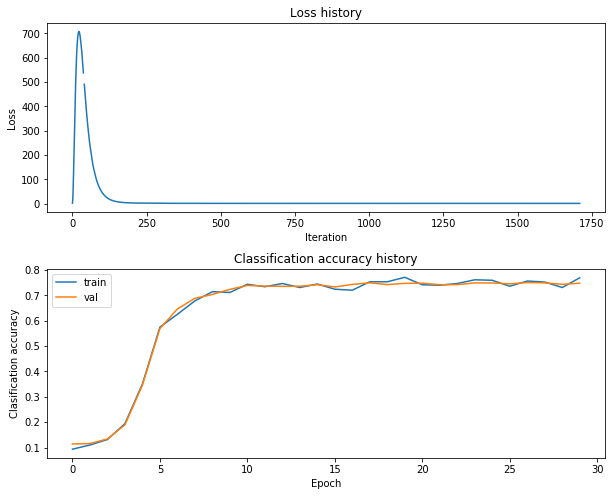

In [475]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.subplots_adjust(wspace =0, hspace =0.3)


# Plot the loss function and train / validation accuracies

plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

In [461]:
# Fine-tune hyperparameters such as learning_rates and regularization_strengths
# To find the best_net for predicting on the test (It takes about 1~3 minutes depends on CPU)
# Other hyperparameters: hidden_size / num_epochs / ...

hidden_size = 10
num_classes = 10

results = {}
best_val = -1
best_net = None

learning_rates = np.array([50,110,130,140,190,220,250])*1e-4
regularization_strengths = [0.04,0.05,0.07,0.09,0.1,0.15]

for lr in learning_rates:
    for reg in regularization_strengths:
        net = TwoLayerNet(input_size, hidden_size, num_classes)
        stats = net.train(train_X, train_Y, X_val, y_val,
        num_epochs=10, batch_size=1024,
        learning_rate=lr, learning_rate_decay=0.95,
        reg= reg, verbose=False)
        val_acc = (net.predict(X_val) == y_val).mean()
        if val_acc > best_val:
            best_val = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc


for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print('lr %e reg %e val accuracy: %f' % (
                lr, reg,  val_acc))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

C:\Users\Sonali\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


lr 5.000000e-03 reg 4.000000e-02 val accuracy: 0.107000
lr 5.000000e-03 reg 5.000000e-02 val accuracy: 0.116000
lr 5.000000e-03 reg 7.000000e-02 val accuracy: 0.113000
lr 5.000000e-03 reg 9.000000e-02 val accuracy: 0.437000
lr 5.000000e-03 reg 1.000000e-01 val accuracy: 0.120000
lr 5.000000e-03 reg 1.500000e-01 val accuracy: 0.137000
lr 1.100000e-02 reg 4.000000e-02 val accuracy: 0.107000
lr 1.100000e-02 reg 5.000000e-02 val accuracy: 0.118000
lr 1.100000e-02 reg 7.000000e-02 val accuracy: 0.124000
lr 1.100000e-02 reg 9.000000e-02 val accuracy: 0.237000
lr 1.100000e-02 reg 1.000000e-01 val accuracy: 0.221000
lr 1.100000e-02 reg 1.500000e-01 val accuracy: 0.569000
lr 1.300000e-02 reg 4.000000e-02 val accuracy: 0.099000
lr 1.300000e-02 reg 5.000000e-02 val accuracy: 0.124000
lr 1.300000e-02 reg 7.000000e-02 val accuracy: 0.297000
lr 1.300000e-02 reg 9.000000e-02 val accuracy: 0.692000
lr 1.300000e-02 reg 1.000000e-01 val accuracy: 0.606000
lr 1.300000e-02 reg 1.500000e-01 val accuracy: 0

In [476]:
# Predict on the test set (using the best_net)
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.7407


Accuracy of the Training Set is: 0.7525254237288136
Accuracy of the Validation Set is: 0.748


<Figure size 720x576 with 0 Axes>

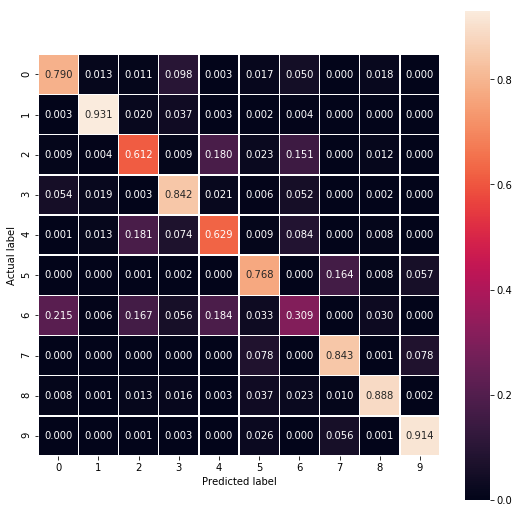

In [477]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
y_pred = net.predict(train_X)
y_pred = y_pred.flatten()
train_Y = train_Y.flatten()
# print(y_pred)

new_list_pred = []
for item in y_pred:
    new_list_pred.append(float(item))
cofmat = confusion_matrix(train_Y,new_list_pred)
plt.clf()

cofmat_normalized = cofmat.astype('float')/ cofmat.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cofmat_normalized,annot=True,fmt=".3f",linewidths=.5,square=True);
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


y_pred_val = net.predict(X_val)
y_pred_val = y_pred_val.flatten()
y_val = y_val.flatten()
new_list_pred_val = []
for item in y_pred_val:
    new_list_pred_val.append(float(item))
print("Accuracy of the Training Set is:",metrics.accuracy_score(train_Y, new_list_pred))
print("Accuracy of the Validation Set is:",metrics.accuracy_score(y_val, new_list_pred_val))


# Multilayer Neural Network

In [478]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt

In [479]:
X_train, y_train = load_mnist('fashion/data', kind='train')
X_test, y_test = load_mnist('fashion/data', kind='t10k')
# print(len(y_test))

#Normalize the data
X_train= (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 28, 28))
X_test = X_test.reshape((-1, 28, 28))

print(X_train.shape) # (60000, 784)
print(X_test.shape)  # (10000, 784)
m_train = X_train.shape[0]
m_test = X_test.shape[0]

(60000, 28, 28)
(10000, 28, 28)


In [480]:
# Subsample the data
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = X_train[mask]
y_val = y_train[mask]

mask = list(range(m_train))
X_train = X_train[mask]
y_train = y_train[mask]

mask = list(range(m_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [481]:
print("train_images:", X_train.shape)
print("test_images:", X_test.shape)
# train_images: (60000, 28, 28)
# test_images: (10000, 28, 28)


train_images: (59000, 28, 28)
test_images: (10000, 28, 28)


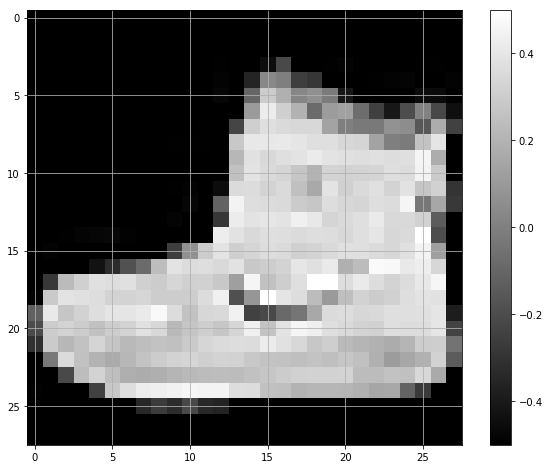

In [482]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(True)

In [485]:
# Model a simple 3-layer neural network
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [486]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [492]:
X_train=X_train.reshape(len(X_train),28,28)
m3 = model3.fit(X_train, y_train, epochs=10, validation_split=0.2)


Train on 47200 samples, validate on 11800 samples
Epoch 1/10
47200/47200 [==============================] - 3s 61us/sample - loss: 0.2532 - acc: 0.9053 - val_loss: 0.3308 - val_acc: 0.8843
Epoch 2/10
47200/47200 [==============================] - 3s 62us/sample - loss: 0.2293 - acc: 0.9151 - val_loss: 0.3293 - val_acc: 0.8869
Epoch 3/10
47200/47200 [==============================] - 3s 64us/sample - loss: 0.2184 - acc: 0.9182 - val_loss: 0.3258 - val_acc: 0.8899
Epoch 4/10
47200/47200 [==============================] - 3s 60us/sample - loss: 0.2061 - acc: 0.9240 - val_loss: 0.3359 - val_acc: 0.8876
Epoch 5/10
47200/47200 [==============================] - 3s 66us/sample - loss: 0.2010 - acc: 0.9257 - val_loss: 0.3393 - val_acc: 0.8870
Epoch 6/10
47200/47200 [==============================] - 3s 64us/sample - loss: 0.1934 - acc: 0.9287 - val_loss: 0.3316 - val_acc: 0.8898
Epoch 7/10
47200/47200 [==============================] - 3s 71us/sample - loss: 0.1848 - acc: 0.9311 - val_loss: 0.

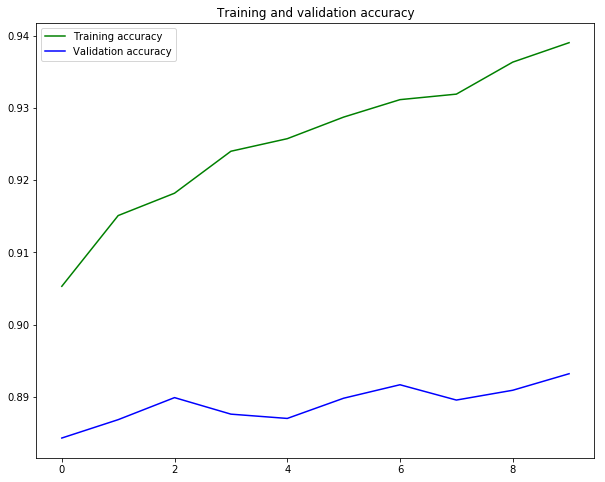

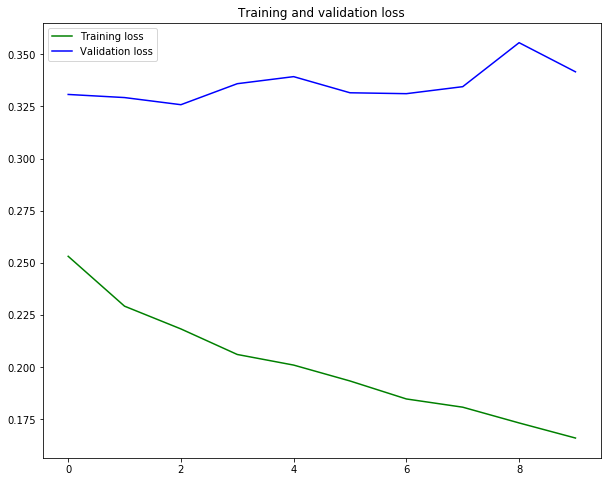

In [493]:
accuracy = m3.history['acc']
# print(accuracy)
val_accuracy = m3.history['val_acc']
# print(val_accuracy)
loss = m3.history['loss']
# print(loss)
val_loss = m3.history['val_loss']
# print(val_loss)
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [495]:
X_test=X_test.reshape(len(X_test),28,28)
test_loss, test_acc = model3.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.2978 - acc: 0.8996


Accuracy of the Training Set is: 0.936322033898305
Accuracy of the Validation Set is: 0.893


<Figure size 720x576 with 0 Axes>

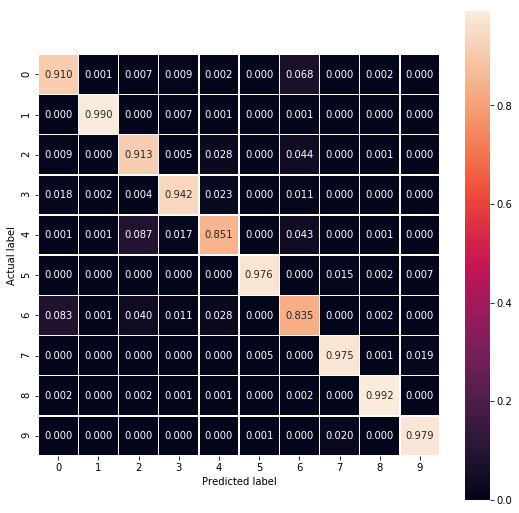

In [500]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
y_pred = model3.predict_classes(X_train)
y_pred = y_pred.flatten()
y_train = y_train.flatten()
# print(y_pred)

new_list_pred = []
for item in y_pred:
    new_list_pred.append(float(item))
cofmat = confusion_matrix(y_train,new_list_pred)
plt.clf()

cofmat_normalized = cofmat.astype('float')/ cofmat.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cofmat_normalized,annot=True,fmt=".3f",linewidths=.5,square=True);
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


y_pred_val = model3.predict_classes(X_val)
y_pred_val = y_pred_val.flatten()
y_val = y_val.flatten()
new_list_pred_val = []
for item in y_pred_val:
    new_list_pred_val.append(float(item))
print("Accuracy of the Training Set is:",metrics.accuracy_score(train_Y, new_list_pred))
print("Accuracy of the Validation Set is:",metrics.accuracy_score(y_val, new_list_pred_val))


In [507]:

# Model a simple 6-layer neural network 
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model6.summary() 
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_______________________________________________

In [508]:

#Train the NN-6 with 5 epochs 
X_test=X_test.reshape(len(X_test),28,28)
m6 = model6.fit(X_train, y_train, epochs=4, validation_split=0.2)

#Evaluate the model with test datasets
test_loss, test_acc = model6.evaluate(X_test, y_test)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Train on 47200 samples, validate on 11800 samples
Epoch 1/4
47200/47200 [==============================] - 4s 90us/sample - loss: 0.5172 - acc: 0.8102 - val_loss: 0.4276 - val_acc: 0.8458
Epoch 2/4
47200/47200 [==============================] - 4s 81us/sample - loss: 0.3908 - acc: 0.8555 - val_loss: 0.3797 - val_acc: 0.8627
Epoch 3/4
47200/47200 [==============================] - 4s 83us/sample - loss: 0.3516 - acc: 0.8702 - val_loss: 0.3825 - val_acc: 0.8617
Epoch 4/4
10000/10000 [==============================] - 0s 41us/sample - loss: 0.3767 - acc: 0.8619
Model - 6 layers - test loss: 37.67122776031494
Model - 6 layers - test accuracy: 86.18999719619751


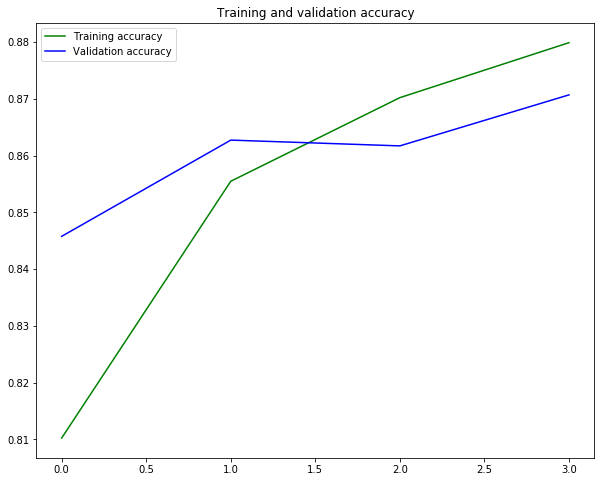

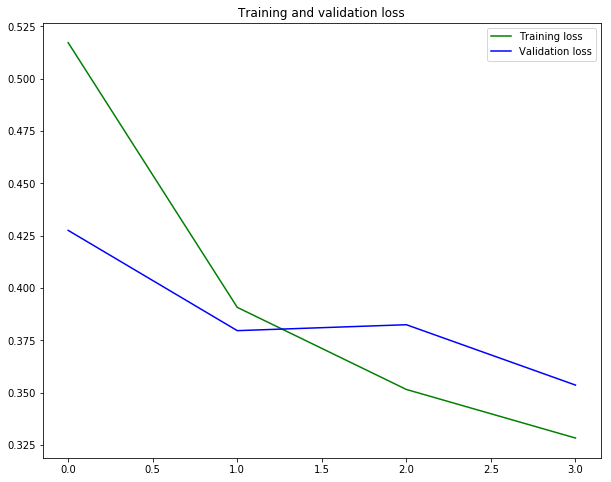

In [509]:
accuracy = m6.history['acc']
# print(accuracy)
val_accuracy = m6.history['val_acc']
# print(val_accuracy)
loss = m6.history['loss']
# print(loss)
val_loss = m6.history['val_loss']
# print(val_loss)
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Accuracy of the Training Set is: 0.882406779661017
Accuracy of the Validation Set is: 0.865


<Figure size 720x576 with 0 Axes>

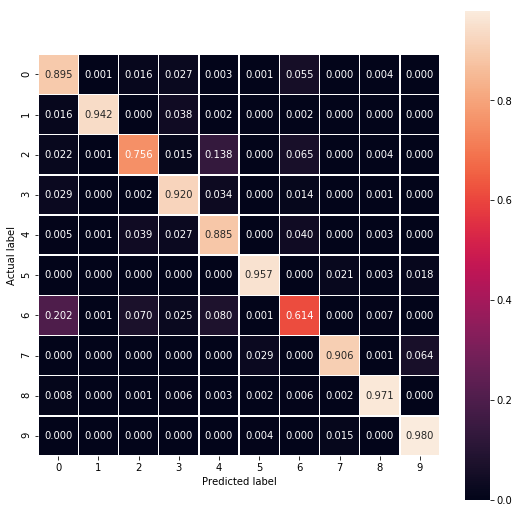

In [510]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
y_pred = model6.predict_classes(X_train)
y_pred = y_pred.flatten()
y_train = y_train.flatten()
# print(y_pred)

new_list_pred = []
for item in y_pred:
    new_list_pred.append(float(item))
cofmat = confusion_matrix(y_train,new_list_pred)
plt.clf()

cofmat_normalized = cofmat.astype('float')/ cofmat.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cofmat_normalized,annot=True,fmt=".3f",linewidths=.5,square=True);
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


y_pred_val = model6.predict_classes(X_val)
y_pred_val = y_pred_val.flatten()
y_val = y_val.flatten()
new_list_pred_val = []
for item in y_pred_val:
    new_list_pred_val.append(float(item))
print("Accuracy of the Training Set is:",metrics.accuracy_score(train_Y, new_list_pred))
print("Accuracy of the Validation Set is:",metrics.accuracy_score(y_val, new_list_pred_val))

# CNN

In [592]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [593]:

# Load the data
X_train, y_train = load_mnist('fashion/data', kind='train')

# , y_train 
# y_train = load_mnist('C:/Users/Sonali/Downloads/data_with_notebook (1)/data/fashion/train-labels-idx1-ubyte.gz/', kind = 'train')
X_test, y_test = load_mnist('fashion/data', kind='t10k')
from sklearn.model_selection import train_test_split
# X_train,valid_X,y_train,valid_label = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

X_train= (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)  # (10000, 784)
m_train = X_train.shape[0]
m_test = X_test.shape[0]

(60000, 784)
(10000, 784)


In [594]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [595]:
train_X = X_train.reshape(-1, 28,28, 1)
test_X = X_test.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [596]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.
# print(train_X)

In [597]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
# print(train_Y_one_hot)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [598]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [599]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [600]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [601]:
batch_size = 64
epochs = 5
num_classes = 10

In [602]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [605]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [606]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [607]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 75s 2ms/step - loss: 0.8730 - acc: 0.6736 - val_loss: 0.5735 - val_acc: 0.7940
Epoch 2/5
48000/48000 [==============================] - 70s 1ms/step - loss: 0.4927 - acc: 0.8163 - val_loss: 0.4423 - val_acc: 0.8432
Epoch 3/5
48000/48000 [==============================] - 68s 1ms/step - loss: 0.4070 - acc: 0.8503 - val_loss: 0.4051 - val_acc: 0.8548
Epoch 4/5
48000/48000 [==============================] - 74s 2ms/step - loss: 0.3619 - acc: 0.8662 - val_loss: 0.3690 - val_acc: 0.8679
Epoch 5/5
48000/48000 [==============================] - 71s 1ms/step - loss: 0.3351 - acc: 0.8771 - val_loss: 0.3412 - val_acc: 0.8768


In [608]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
# print(test_X)
# print(test_Y_one_hot)

In [609]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3573167956352234
Test accuracy: 0.8687


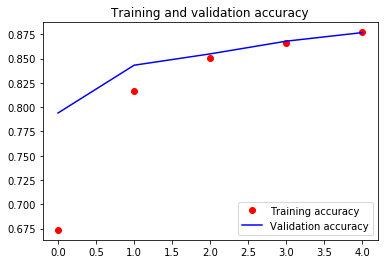

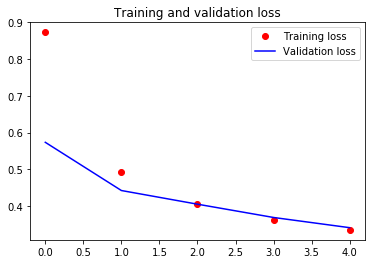

In [610]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Accuracy of the Training Set is: 0.7036666666666667


<Figure size 432x288 with 0 Axes>

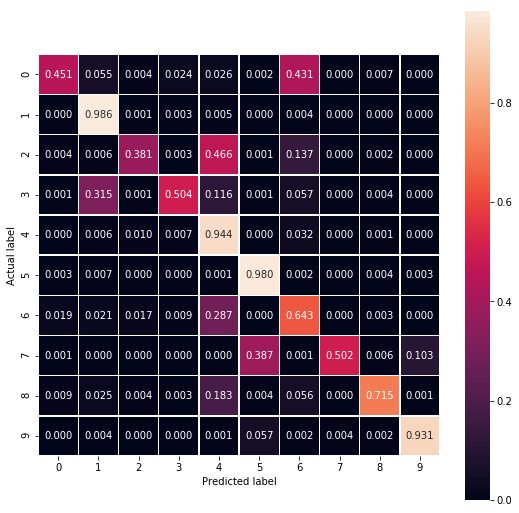

In [633]:
X_train, y_train = load_mnist('fashion/data', kind='train')
train_X = X_train.reshape(-1, 28,28, 1)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
y_pred = fashion_model.predict_classes(train_X)
y_pred = y_pred.flatten()
y_train = y_train.flatten()
# print(y_pred)

new_list_pred = []
for item in y_pred:
    new_list_pred.append(float(item))
    
cofmat = confusion_matrix(y_train,new_list_pred)
plt.clf()

cofmat_normalized = cofmat.astype('float')/ cofmat.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cofmat_normalized,annot=True,fmt=".3f",linewidths=.5,square=True);
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


y_pred_val = fashion_model.predict_classes(valid_X)
y_pred_val = y_pred_val.flatten()
valid_label = valid_label.flatten()
new_list_pred_val = []
for item in y_pred_val:
    new_list_pred_val.append(float(item))
print("Accuracy of the Training Set is:",metrics.accuracy_score(y_train, new_list_pred))
# print("Accuracy of the Validation Set is:",metrics.accuracy_score(valid_label, new_list_pred_val))